<a href="https://colab.research.google.com/github/eunyeongkimm/personal_project/blob/main/doughnut_chart_%EC%82%AC%EA%B0%81%ED%98%95_%EB%A0%88%EC%9D%B4%EB%B8%94_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] =False

In [4]:

# 색상 팔레트 설정
#colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

color_list = [
    "#67b7dc", "#6794dc", "#6771dc", "#8067dc", "#a367dc",
    "#c767dc", "#dc67ce", "#dc67ab", "#dc6788", "#dc6967",
    "#dc8c67", "#dcaf67", "#dcd267", "#c3dc67", "#a0dc67",
    "#7ddc67", "#67dc75", "#67dc98", "#67dcbb", "#67dadc"
]


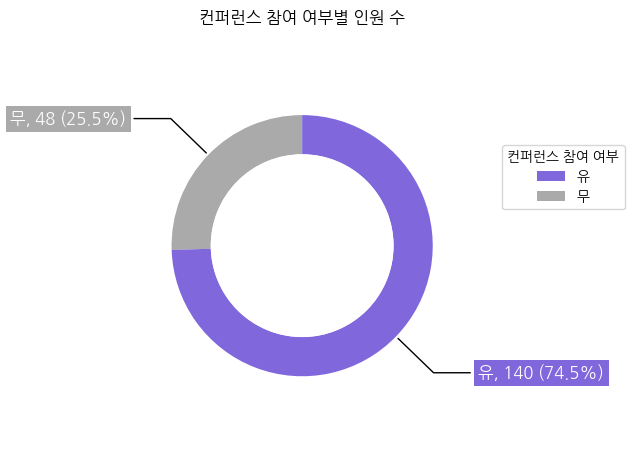

In [5]:
### 최종버전

# 데이터 설정
labels = ['무', '유']
sizes = [48, 140]
colors = ['#aaa', color_list[3]]  # 색상
explode = (0.00, 0.00)  # 조각이 돌출되는 정도

total = sum(sizes)  # 총합 계산
percentages = [f'{100 * size / total:.1f}%' for size in sizes]  # 백분율 계산


# 도넛 차트 그리기
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=None, colors=colors, autopct='', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.3))

# 도넛 차트 중심에 원 그리기 (도넛 모양 만들기)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# 각 조각 옆에 사각형 레이블 추가
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    label_str = f'{labels[i]}, {sizes[i]} ({percentages[i]})'  # 여기서 레이블 문자열을 조합
    ax.annotate(label_str, xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment,
                 verticalalignment='center',
                 bbox=dict(boxstyle="square, pad=0.3", fc=colors[i], ec="white", lw=0.72),
                 fontsize=12, color = 'white',
                 arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle, color="black"))

# 범례 추가 (유/무 순서로 변경)
legend = ax.legend([wedges[1], wedges[0]], [labels[1], labels[0]], title="컨퍼런스 참여 여부", loc="best", bbox_to_anchor=(1, 0.75))


# 차트 제목 추가
plt.title('컨퍼런스 참여 여부별 인원 수')

ax.axis('equal')
plt.tight_layout()  # 레이아웃 조정

plt.show()
